# Diskrétní populační modely


Diskrétní populační modely jsou zpravidla rekurentní vzorce, které určují
velikost populace nebo populací v dalším roce na základě velikostí v předchozím
roce (modely prvního řádu) nebo několika předchozích let (modely vyššího řádu).
Je-li závislost lineární, můžeme tyto modely zapsat pomocí maticového násobení,
jak jsme poznali již dříve například u Leslieho matice. To je výhodné, protože můžeme využít rozvinutý aparát lineární algebry.

Výhodou diskrétních maticových modelů oproti spojitým je jednodušší řešení. To
spočívá v opakovaném používání modelu a v postupném výpočtu populačních stavů
jenom použitím jednoduchých matematických operací. Nevýhodou je horší možnost
nalezení analytického řešení a že se modely někdy mohou chovat nečekaně, viz
například chaos v diskrétní logistické rovnici. 


## Diskrétní modely jednodruhové populace

### Základní diskrétní modely

Diskrétní model jednodruhové populace modelovaný rovnicí prvního řádu má obecný
tvar $$x(k+1)=x(k) f(x(k)),$$ kde funkce $f$ charakterizuje působení
vnitrodruhové konkurence. 

Základní diskrétní model, diskrétní logistickou rovnici, jsme poznali dříve.
Tento model je jednoduchý, ale má komplikované chování, které může vést k
periodickým řešením s vysokou periodou a k chaosu.

Ukážeme si volbu tří funkcí, které mají společné chování v počátku a při
dosažení nosné kapacity prostředí. Konkrétně, platí $f(0)=r$ a $f(K)=1$.

* Logistický růst $$x(k+1)=r x(k)\left(1-\frac{x(k)}{K}\frac{r-1}{r}\right)$$
* Bevertonova–Holtova rovnice, logistická rovnice Pielou: $$x(k+1)=x(t)\frac{rK}{K+(r-1)x(k)}$$
* Rickerova logistická rovnice: $$ x(k+1)=x(k)e^{\left(1-\frac {x(t)}K\right)\ln r} $$

In [1]:
import numpy as np  # knihovna pro numerické výpočty
import matplotlib.pyplot as plt  # knihovna pro grafiku
import pandas as pd # knihovna pro praci s tabulkami

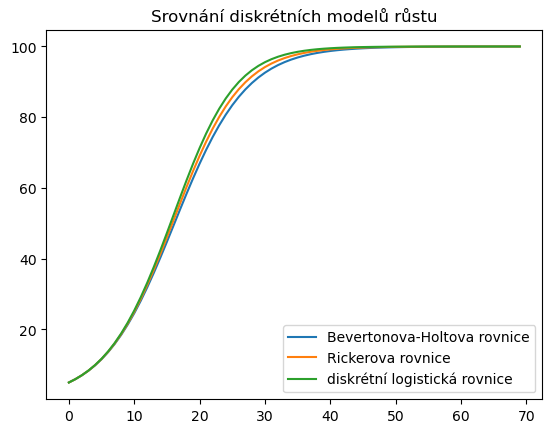

In [2]:
N = 70
x_p = np.zeros(N)
x_p[0] = 5
x_r = x_p.copy()
x_l = x_p.copy()
r = 1.2
K = 100

for k in range(N-1):
    x_p[k+1] = x_p[k]*(r*K)/(K+(r-1)*x_p[k])
    x_r[k+1] = x_r[k]*np.exp((1-x_r[k]/K)*np.log(r))
    x_l[k+1] = x_l[k]*r*(1-x_l[k]/(K*r/(r-1)))

fig, ax = plt.subplots()
ax.plot(x_p, label = "Bevertonova-Holtova rovnice")
ax.plot(x_r, label = "Rickerova rovnice")
ax.plot(x_l, label = "diskrétní logistická rovnice")
ax.legend()
ax.set(
    title="Srovnání diskrétních modelů růstu");  

### Periodické cikády

```{index} single: Model ; periodických cikád
```

```{margin} Periodické cikády

![](pics/cikada.jpg)

Cikády *Magicicada septendecim* se vyznačují synchronizovaným výskytem jednou za 17 let. Celou dobu čekají jako larvy v zemi, aby se po 17 letech vylíhly a nakladly vajíčka pro další generaci.

V roce 2007 byl v Cincinnati teplý leden, ale v únoru byla opět zima. V tomto
roce měly stromy dvě sady listí. To způsobilo,  že cikády se vylíhly o rok
dříve, po 16 letech. Viz [Kevin Fitzgerald:
How Do Cicadas Know When to Emerge from the
Ground?](https://entomologytoday.org/2016/03/22/how-do-cicadas-know-when-to-emerge-from-the-ground/)
(leden 2023).

Obrázek: https://www.flickr.com/photos/lalo_pangue/8931871182
```

Následující model je zpracován podle {cite}`murray1989` a vysvětluje zajímavý
efekt vyskytující se v životě cikád *Magicicada septendecim, M. cassini* a *M. septendecula*.

Dospělé cikády během pár týdnů svého života nakladou vajíčka
u stromů, kde se vylíhly. Z vajíček se vyklubou larvy, které se
zavrtají pod zem ke kořenům. Životní cyklus cikád se liší od 3 do 4,
7, 13 nebo 17 let. Poslední dva typy cikád se vyznačují (na východním
pobřeží severní Ameriky) masovým synchronizovaným výskytem. Viz například [následující video](https://youtu.be/EWr8fzUz-Yw).


Předpokládejme, že druh má životní cyklus $k$ let, larvy dospějí a objeví se na
povrchu $k$ let po smrti rodičů. Nechť $n_t$ je počet larev, které se v roce $t$
zavrtají do země, najdou útočiště a potravu u kořenů stromů a za $k$ let se z
nich (pokud přežijí) vylíhnou dospělé cikády. 

Předpokládejme, jenom  zlomek $\mu$ larev přežije do každého dalšího roku. V
roce $t$ se vylíhnou larvy, které se před $k$ lety zavrtaly do země (jejich
počet byl $n_{t-k}$) a v zemi přežily celkem $k$ let (každý rok jich přežije
jenom $\mu$-násobek a proto $k$ let přežije $\mu^kn_{t-k}$ larev). Tyto larvy se
objeví v roce $t$ jako dospělí, kteří uzavřou cyklus. Z tohoto počtu predátoři
zlikvidují $p_t$ cikád a pro další rozmnožování zůstane $[\mu^kn_{t-k}-p_t]_+$
jedinců, kde $[x]_+=\max(x,0)$. Jestliže se každé cikádě narodí průměrně $f$
larev, přibude v tomto roce $$M_t=f\cdot[\mu^kn_{t-k}-p_t]_+$$ larev.

Je-li $D$ celková nosná kapacita prostředí, je *volná* kapacita 
dána vztahem $$c_t=\left[D-\sum_{i=1}^{k-1}\mu^in_{t-i}\right]_+,$$ protože
část této kapacity obsadily larvy z loni, předloni, předpředloni atd.
Z $M_t$ narozených larev se maximálně $c_t$ může zavrtat do země
a přežít. Proto počet larev v dalším roce dán vztahem
$n_t=\min\left(M_t, c_t\right)$.

Působení predátorů (živí se dospělými cikádami) můžeme modelovat
rovnicí $$p_t=\nu p_{t-1}+a\mu^kn_{t-k-1},$$ kde $\nu<1$ (bez cikád
predátoři vymírají, toto vymírání se zastavuje s počtem cikád, které
se loni vylíhly).

Pro lepší formulaci numerického modelu posuneme index $t$ o jedničku. 

$$
\begin{aligned}
  p_{t+1}&=\nu p_t+a\mu^kn_{t-k} \\
  c_{t+1}&=\Bigl[D-\sum_{i=1}^{k-1}\mu^in_{t+1-i}\Bigr]_+\\
  M_{t+1}&=f\cdot\bigl[\mu^k n_{t+1-k}-p_{t+1}\bigr]_+ \\  
  n_{t+1}&=\min(M_{t+1}, c_{t+1})
\end{aligned}
$$

In [3]:
def cikady(
    a=.042, # parametry populace (Murray)
    f=10,
    D=10000,
    nu=.95,
    mu=.95,
    k=4, # perioda cikad
    N = 200, # delka simulace
    n0 = 100 # pocatecni hodnoty
    ):

    n = np.zeros(N)
    p = np.zeros(N)
    n[0:k] = n0

    for t in range(k-1,N-1):
        p[t+1] = nu*p[t] + a*mu**k*n[t-k]
        c = max(
              0,
              D-sum([mu**(i)*n[t+1-i] for i in range(1,k)])
              )
        M = max(
              0,
              f*(mu**k*n[t+1-k]-p[t+1])
              )
        n[t+1] = min(M,c)
    return n

stadium_larvy = [4,7,13,17]
reseni = np.array([cikady(k=k) for k in stadium_larvy])
reseni = pd.DataFrame(reseni.T,columns = stadium_larvy)
reseni.tail(20).T.style.background_gradient(axis=1).format(precision=0)

,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
4,2696,2695,2695,2695,2696,2695,2695,2695,2696,2695,2695,2695,2696,2695,2695,2695,2696,2695,2695,2695
7,1657,1657,1658,1658,1657,1657,1657,1657,1657,1658,1658,1657,1657,1657,1657,1657,1658,1658,1657,1657
13,0,0,10000,0,0,0,0,0,0,0,0,0,0,0,0,10000,0,0,0,0
17,0,0,0,0,0,0,0,10000,0,0,0,0,0,0,0,0,0,0,0,0


Varianta použitelná pro velké tabulky, podle [User Guide](https://pandas.pydata.org/docs/user_guide/style.html#Magnify).

In [4]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "4pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

reseni.tail(50).T.style.background_gradient(axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '2pt'})\
    .set_caption("Hover to magnify")\
    .format(precision=0)\
    .set_table_styles(magnify())

,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
4,2694,2694,2698,2695,2695,2695,2697,2695,2695,2695,2697,2695,2695,2695,2697,2695,2695,2695,2697,2695,2695,2695,2696,2695,2695,2695,2696,2695,2695,2695,2696,2695,2695,2695,2696,2695,2695,2695,2696,2695,2695,2695,2696,2695,2695,2695,2696,2695,2695,2695
7,1657,1657,1657,1657,1660,1659,1657,1657,1657,1657,1657,1659,1658,1657,1657,1657,1657,1657,1659,1658,1657,1657,1657,1657,1657,1658,1658,1657,1657,1657,1657,1657,1658,1658,1657,1657,1657,1657,1657,1658,1658,1657,1657,1657,1657,1657,1658,1658,1657,1657
13,0,0,0,0,0,0,10000,0,0,0,0,0,0,0,0,0,0,0,0,10000,0,0,0,0,0,0,0,0,0,0,0,0,10000,0,0,0,0,0,0,0,0,0,0,0,0,10000,0,0,0,0
17,0,0,0,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10000,0,0,0,0,0,0,0,0,0,0,0,0


Grafické znázornění.

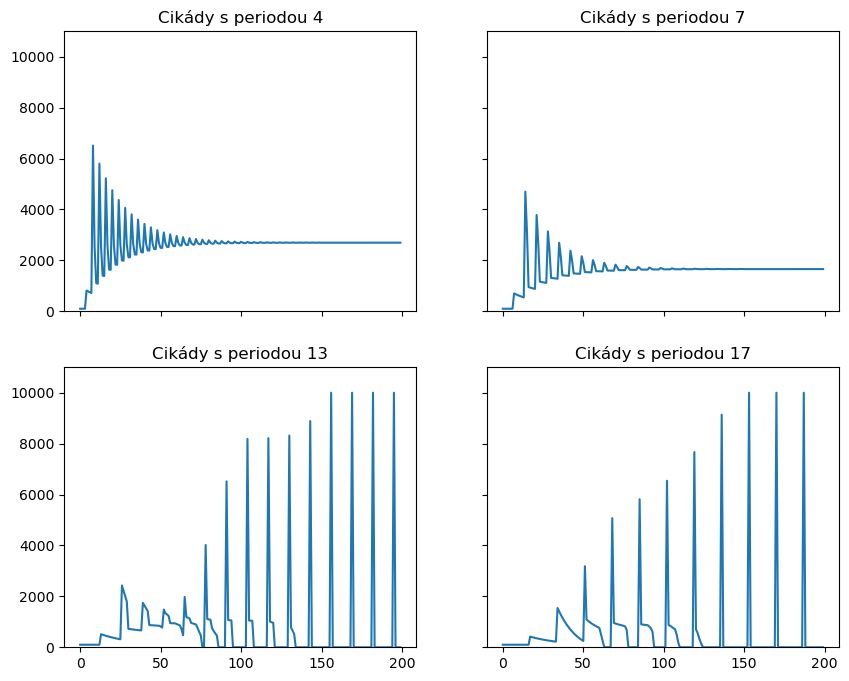

In [5]:
fig, axs = plt.subplots(
                      2,
                      2,
                      figsize=(10,8), 
                      sharex=True, 
                      sharey=True
                      )
D = 10000
for k,ax in zip([4, 7, 13, 17], axs.flatten()):
    ax.plot(reseni[k])
    ax.set(
      ylim=(0,D*1.1),
      title="Cikády s periodou "+str(k))

## Diskrétní modely dvou populací